# Programming Exercise 5b: Regularized Linear Regression and Bias v.s. Variance
In this exercise we implement regularized logistic regression using skleanr and not our own defined class.

## Load and review the data

In [2]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [6]:
# Loading all data on a dictonary
data = loadmat('ex5data1.mat')

# Convert the data into a numpy array
X = data['X']
y = data['y'].flatten()
Xtest = data['Xtest']
ytest = data['ytest'].flatten()
Xval = data['Xval']
yval = data['yval'].flatten()

# m = number of training examples
# n = number of features
(m,n) = X.shape
# Add a ones column to X
# X = np.append(np.ones((m, 1)), X, axis=1)
# Xval = np.append(np.ones((Xval.shape[0], 1)), Xval, axis=1)
# Xtest = np.append(np.ones((Xtest.shape[0], 1)), Xtest, axis=1)

Text(0, 0.5, 'Water flowing out of the dam (y)')

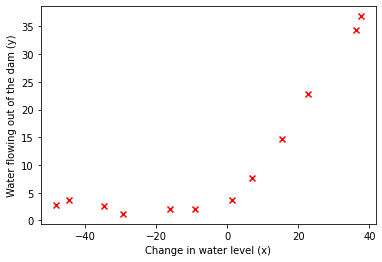

In [7]:
plt.scatter(X, y, marker='x', color='red')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

## Training the model

In [13]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

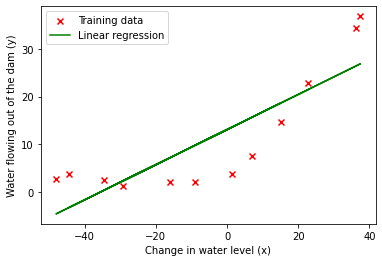

In [14]:
# Using the predict method we plot the bist fit line
plt.scatter(X, y, marker='x', color='red')
plt.plot(X, y_pred, color='green')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])

The values of $\theta$ are:

In [15]:
lr.coef_

array([0.36777923])

## Learning Curve

In [ ]:
#This function calculates and plots the learning curve 
def learningCurve(X_train, y_train, X_val, y_val, epochs, lmbd):
    
    # m = number of training examples
    # n = number of features
    (m,n) = X_train.shape
    
    lr = linearRegression(epochs,lmbd)

    for i in range(m):
        lr.fit(X_train[:i+1,:],y_train[:i+1])
        error_train[i], grad = lr._CostFunction(lr.theta, X_train[:i+1,:], y_train[:i+1], 0)
        error_val[i], grad = lr._CostFunction(lr.theta, X_val, y_val, 0)
        
    # plot the learning curves
    plt.xlim(min(range(1, m+1))-1, max(range(1, m+1))+1)
    plt.ylim(0, 150)
    plt.plot(range(1, m+1), error_train, color='blue')
    plt.plot(range(1, m+1), error_val, color='green')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.legend(['Train', 'Cross Validation'])
    plt.title('Polynomial Regression with lambda={:.2f}'.format(lmbd))
    
    return

## Polynomial Regression

In [17]:
# It is important to understand the following:
# From https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
# mms.fit -> Compute the minimum and maximum to be used for later scaling
# mms.fit_transform ->  Fit to data, then transform it
# mms.transform ->  Scale features of X according to feature_range
# this helps to transform a test dataset or any new data point

# Adding Polynomial degrees and 
# tandardizing the data using min-max scaling from sklearn
trans = PolynomialFeatures(degree=8)
stdsc = StandardScaler()

# We increment polynomial degrees and standardize all three datasets
# We already added the 1s column
X_poly = trans.fit_transform(X)
X_poly = stdsc.fit_transform(X_poly)

X_poly_val = trans.transform(Xval)
X_poly_val = stdsc.transform(X_poly_val)

X_poly_test = trans.transform(Xtest)
X_poly_test = stdsc.transform(X_poly_test)

In [18]:
lr = LinearRegression()
lr.fit(X_poly, y)
lr.coef_

array([  0.        ,   9.13124818,  18.17727033,  28.9301793 ,
       -27.23824133, -74.47076142,   6.77178106,  60.68644113,
        20.63841717])

In [19]:
X_fit = np.arange(-100, 100, 5)[:, np.newaxis]
X_poly_fit = trans.transform(X_fit)
X_poly_fit = stdsc.transform(X_poly_fit)

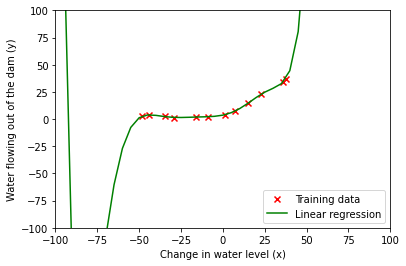

In [20]:
# Using the predict method we plot the bist fit line
plt.scatter(X, y, marker='x', color='red')
plt.plot(X_fit, lr.predict(X_poly_fit), color='green')
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.legend(['Training data', 'Linear regression'])
# plt.title('Polynomial Regression with lambda={:.2f}'.format(lmbd))